In [1]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

In [2]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/kaggle/input/shape-predictor-68-face-landmarksdat/shape_predictor_68_face_landmarks.dat")

def detect_landmarks(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)
    
    if len(faces) == 0:
        print("No face detected")
        return image, None
    
    landmarks = predictor(gray, faces[0])
    return image, landmarks

def swap_eyes_and_mouth(image_path):
    image, landmarks = detect_landmarks(image_path)
    if landmarks is None:
        return image, False
    
    eyes_indices = list(range(36, 48))
    mouth_indices = list(range(48, 68))
    
    eyes_points = np.array([(landmarks.part(n).x, landmarks.part(n).y) for n in eyes_indices])
    mouth_points = np.array([(landmarks.part(n).x, landmarks.part(n).y) for n in mouth_indices])
    
    eyes_bbox = cv2.boundingRect(eyes_points)
    mouth_bbox = cv2.boundingRect(mouth_points)

    eyes_roi = image[eyes_bbox[1]-20:eyes_bbox[1]+eyes_bbox[3]+20, eyes_bbox[0]-20:eyes_bbox[0]+eyes_bbox[2]+20]
    mouth_roi = image[mouth_bbox[1]-20:mouth_bbox[1]+mouth_bbox[3]+20, mouth_bbox[0]-20:mouth_bbox[0]+mouth_bbox[2]+20]
    
    eyes_resized = cv2.resize(eyes_roi, (mouth_bbox[2]+40, mouth_bbox[3]+40))
    mouth_resized = cv2.resize(mouth_roi, (eyes_bbox[2]+40, eyes_bbox[3]+40))
    
    image[mouth_bbox[1]-20:mouth_bbox[1]+mouth_bbox[3]+20, mouth_bbox[0]-20:mouth_bbox[0]+mouth_bbox[2]+20] = eyes_resized
    image[eyes_bbox[1]-20:eyes_bbox[1]+eyes_bbox[3]+20, eyes_bbox[0]-20:eyes_bbox[0]+eyes_bbox[2]+20] = mouth_resized
    
    return image, True

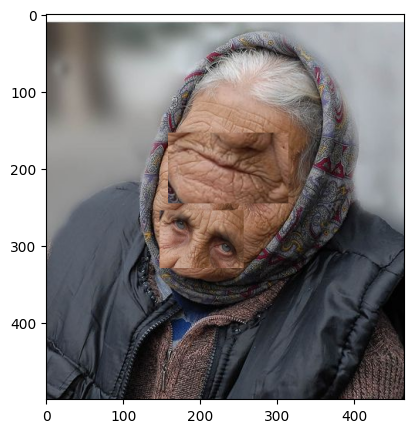

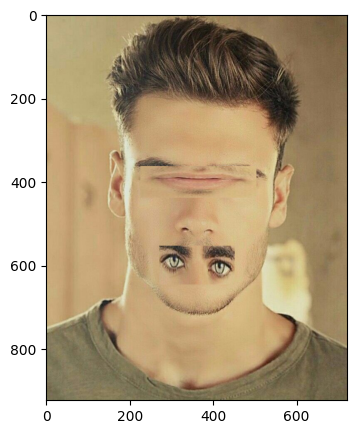

No face detected


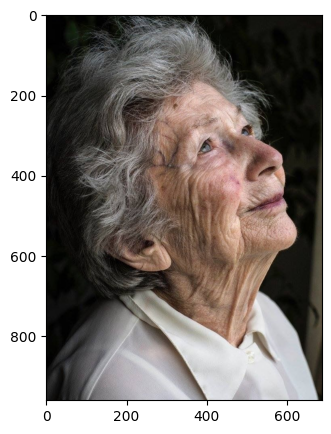

No face detected


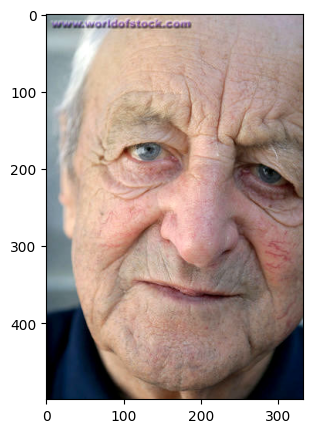

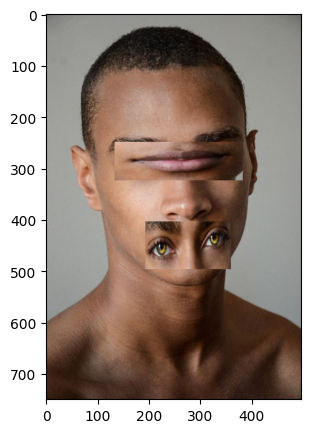

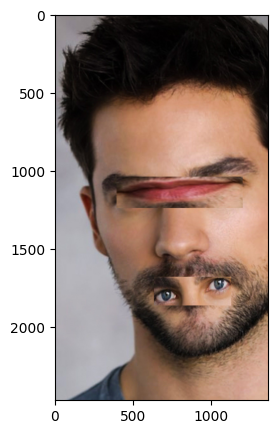

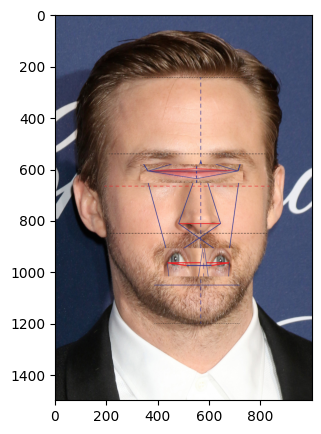

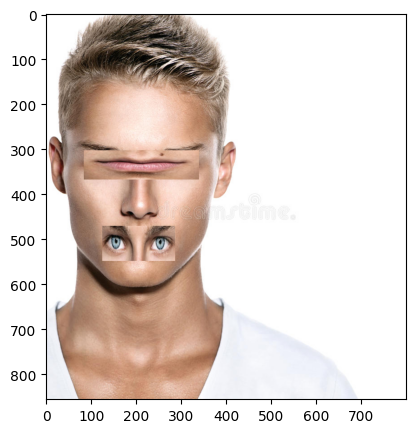

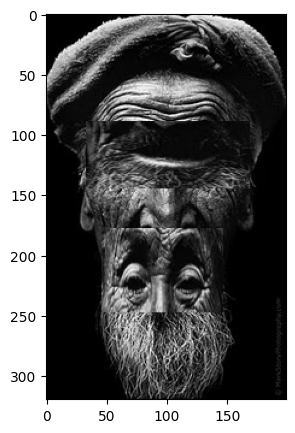

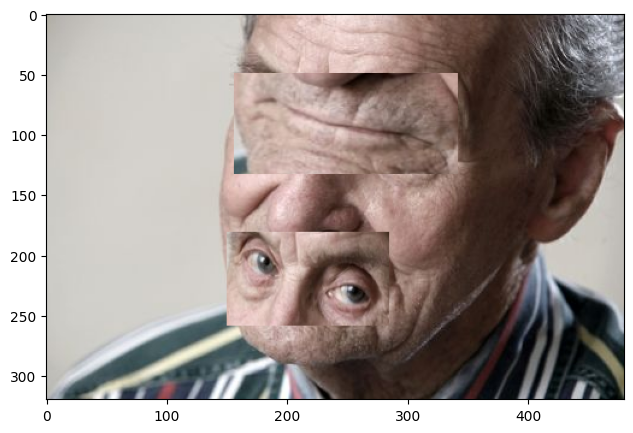

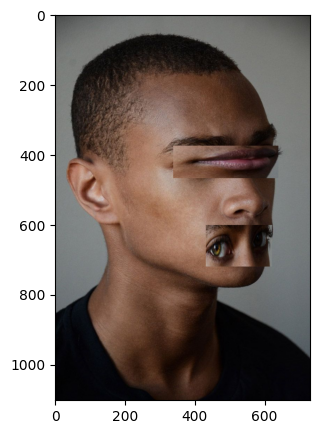

In [3]:
folder_path = "/kaggle/input/human-faces/Humans/"

files = os.listdir(folder_path)
for i, file_name in enumerate(files):
    file_path = os.path.join(folder_path, file_name)
    if file_path.lower().endswith(('.png', '.jpg', '.jpeg')):
        modified_img, success = swap_eyes_and_mouth(file_path)
        plt.figure(figsize=(10, 5))
        plt.imshow(cv2.cvtColor(modified_img, cv2.COLOR_BGR2RGB))
        plt.show()
    if i == 10: break

In [4]:
folder_path = "/kaggle/input/human-faces/Humans/"
output_folder = "/kaggle/working/human-swap/"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
    print(f"Created the folder: {output_folder}")

files = os.listdir(folder_path)
for i, file_name in enumerate(files):
    file_path = os.path.join(folder_path, file_name)
    if file_path.lower().endswith(('.png', '.jpg', '.jpeg')):
        try:
            modified_img, success = swap_eyes_and_mouth(file_path)
            if not success: continue
            else:
                modified_img = cv2.cvtColor(modified_img, cv2.COLOR_BGR2RGB)
                modified_img_pil = Image.fromarray(modified_img)
                modified_img_path = os.path.join(output_folder, f"swapped_{file_name}")
                modified_img_pil.save(modified_img_path)
        except:
            continue

Created the folder: /kaggle/working/human-swap/
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
No face detected
